In [2]:
import os
from google.colab import userdata

os.environ["HF"] = userdata.get("HF")
os.environ["fotball"] = userdata.get("fotball")

In [3]:
!nvidia-smi

Thu May  1 09:54:43 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   34C    P8              9W /   70W |       0MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [4]:
!pip install -q gdown inference-gpu

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 105.7/105.7 kB 7.6 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.9/89.9 kB 7.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.4/99.4 kB 9.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 52.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.9/75.9 kB 5.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 68.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 67.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 243.4/243.4 kB 19.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.0/64.0 kB 6.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 61.1 MB/s eta 0:00:

In [5]:
!pip install -q git+https://github.com/roboflow/sports.git

  Preparing metadata (setup.py) ... done


In [6]:
!pip list | grep supervision

supervision                           0.25.1


In [7]:
!gdown -O "0bfacc_0.mp4" "https://drive.google.com/uc?id=12TqauVZ9tLAv8kWxTTBFWtgt2hNQ4_ZF"
!gdown -O "2e57b9_0.mp4" "https://drive.google.com/uc?id=19PGw55V8aA6GZu5-Aac5_9mCy3fNxmEf"
!gdown -O "08fd33_0.mp4" "https://drive.google.com/uc?id=1OG8K6wqUw9t7lp9ms1M48DxRhwTYciK-"
!gdown -O "573e61_0.mp4" "https://drive.google.com/uc?id=1yYPKuXbHsCxqjA9G-S6aeR2Kcnos8RPU"
!gdown -O "121364_0.mp4" "https://drive.google.com/uc?id=1vVwjW1dE1drIdd4ZSILfbCGPD4weoNiu"

Downloading...
From: https://drive.google.com/uc?id=12TqauVZ9tLAv8kWxTTBFWtgt2hNQ4_ZF
To: /content/0bfacc_0.mp4
100% 19.9M/19.9M [00:00<00:00, 39.1MB/s]
Downloading...
From: https://drive.google.com/uc?id=19PGw55V8aA6GZu5-Aac5_9mCy3fNxmEf
To: /content/2e57b9_0.mp4
100% 21.1M/21.1M [00:00<00:00, 146MB/s]
Downloading...
From: https://drive.google.com/uc?id=1OG8K6wqUw9t7lp9ms1M48DxRhwTYciK-
To: /content/08fd33_0.mp4
100% 19.9M/19.9M [00:00<00:00, 21.1MB/s]
Downloading...
From: https://drive.google.com/uc?id=1yYPKuXbHsCxqjA9G-S6aeR2Kcnos8RPU
To: /content/573e61_0.mp4
100% 18.9M/18.9M [00:00<00:00, 28.5MB/s]
Downloading...
From: https://drive.google.com/uc?id=1vVwjW1dE1drIdd4ZSILfbCGPD4weoNiu
To: /content/121364_0.mp4
100% 17.2M/17.2M [00:00<00:00, 24.5MB/s]


In [8]:
import os
os.environ["ONNXRUNTIME_EXECUTION_PROVIDERS"] = "[CUDAExecutionProvider]"

In [9]:
from inference import get_model
from google.colab import userdata

ROBOFLOW_API_KEY = userdata.get('fotball')
PLAYER_DETECTION_MODEL_ID = "football-players-detection-3zvbc/12"
PLAYER_DETECTION_MODEL = get_model(model_id=PLAYER_DETECTION_MODEL_ID, api_key=ROBOFLOW_API_KEY)

/usr/local/lib/python3.11/dist-packages/inference/models/utils.py:340: ModelDependencyMissing: Your `inference` configuration does not support Qwen2.5-VL model. Use pip install 'inference[transformers]' to install missing requirements.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/inference/models/utils.py:352: ModelDependencyMissing: Your `inference` configuration does not support SAM model. Use pip install 'inference[sam]' to install missing requirements.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/inference/models/utils.py:362: ModelDependencyMissing: Your `inference` configuration does not support SAM model. Use pip install 'inference[sam]' to install missing requirements.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/inference/models/utils.py:373: ModelDependencyMissing: Your `inference` configuration does not support SAM model. Use pip install 'inference[clip]' to install missing requirements.
  warnings.warn(
/usr/local/lib/python3.11/dist-pack

In [10]:
from tqdm import tqdm
import supervision as sv

INPUT_VIDEO = "/content/2e57b9_0.mp4"
OUTPUT_VIDEO = "/content/2e57b9_0_resultat.mp4"

bbox_drawer = sv.BoxAnnotator(
    color=sv.ColorPalette.from_hex(['#32CD32', '#1E90FF', '#FF69B4', '#FFA500']),
    thickness=3
)

text_drawer = sv.LabelAnnotator(
    color=sv.ColorPalette.from_hex(['#32CD32', '#1E90FF', '#FF69B4', '#FFA500']),
    text_color=sv.Color.from_hex('#FFFFFF')
)

video_metadata = sv.VideoInfo.from_video_path(INPUT_VIDEO)
output_stream = sv.VideoSink(OUTPUT_VIDEO, video_info=video_metadata)
frames = sv.get_video_frames_generator(INPUT_VIDEO)

with output_stream:
    for current_frame in tqdm(frames, total=video_metadata.total_frames):

        prediction = PLAYER_DETECTION_MODEL.infer(current_frame, confidence=0.3)[0]
        results = sv.Detections.from_inference(prediction)

        label_texts = [
            f"{label} ({score:.2f})"
            for label, score in zip(results['class_name'], results.confidence)
        ]

        frame_with_boxes = current_frame.copy()
        frame_with_boxes = bbox_drawer.annotate(frame_with_boxes, results)
        frame_with_boxes = text_drawer.annotate(frame_with_boxes, results, labels=label_texts)
        output_stream.write_frame(frame_with_boxes)


100%|██████████| 750/750 [03:37<00:00,  3.44it/s]


In [11]:
from tqdm import tqdm
import supervision as sv

INPUT_PATH = "/content/2e57b9_0.mp4"
OUTPUT_PATH = "/content/2e57b9_0_resultat2.mp4"
BALL_CLASS_ID = 0

# Ellipse brukes for å markere spillere
player_annotator = sv.EllipseAnnotator(
    color=sv.ColorPalette.from_hex(['#FF6347', '#3CB371', '#00CED1']),
    thickness=2
)

# Trekant brukes for å markere ballen
ball_annotator = sv.TriangleAnnotator(
    color=sv.Color.from_hex('#FFD700'),
    base=24,
    height=20,
    outline_thickness=2
)

# Hent metadata fra videoen og forbered output
video_info = sv.VideoInfo.from_video_path(INPUT_PATH)
video_writer = sv.VideoSink(OUTPUT_PATH, video_info=video_info)
frame_sequence = sv.get_video_frames_generator(INPUT_PATH)

with video_writer:
    for frame in tqdm(frame_sequence, total=video_info.total_frames):

        # Modellprediksjon
        model_output = PLAYER_DETECTION_MODEL.infer(frame, confidence=0.3)[0]
        detections = sv.Detections.from_inference(model_output)

        # Filtrering av ball og spillere
        ball = detections[detections.class_id == BALL_CLASS_ID]
        ball.xyxy = sv.pad_boxes(xyxy=ball.xyxy, px=10)

        players = detections[detections.class_id != BALL_CLASS_ID]
        players = players.with_nms(threshold=0.5, class_agnostic=True)
        players.class_id -= 1

        # Annotering av ramme
        annotated = frame.copy()
        annotated = player_annotator.annotate(scene=annotated, detections=players)
        annotated = ball_annotator.annotate(scene=annotated, detections=ball)

        # Skriv annotert ramme til fil
        video_writer.write_frame(annotated)


100%|██████████| 750/750 [03:41<00:00,  3.38it/s]


In [12]:
from tqdm import tqdm
import supervision as sv

VIDEO_SOURCE = "/content/2e57b9_0.mp4"
TARGET_CLASS_ID = 2
FRAME_INTERVAL = 30

# Generator for å hente hvert N-te bilde
video_frames = sv.get_video_frames_generator(
    source_path=VIDEO_SOURCE, stride=FRAME_INTERVAL
)

extracted_patches = []

for image in tqdm(video_frames, desc="Henter utsnitt av spillere"):
    prediction_output = PLAYER_DETECTION_MODEL.infer(image, confidence=0.3)[0]
    found_objects = sv.Detections.from_inference(prediction_output)

    # Bruk Non-Maximum Suppression og filtrer på spiller-ID
    found_objects = found_objects.with_nms(threshold=0.5, class_agnostic=True)
    target_objects = found_objects[found_objects.class_id == TARGET_CLASS_ID]

    # Hent ut bildepunktene (patches)
    patches = [sv.crop_image(image, box) for box in target_objects.xyxy]
    extracted_patches.extend(patches)


Henter utsnitt av spillere: 25it [00:13,  1.87it/s]


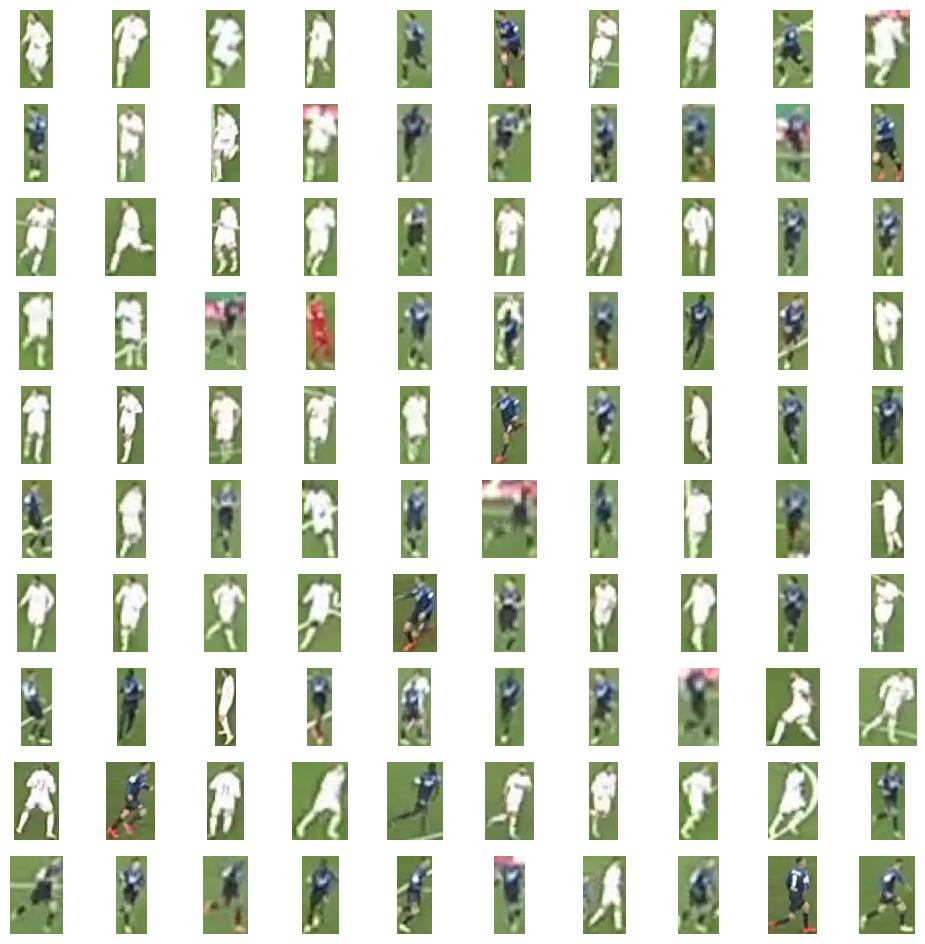

In [13]:
# Vis et rutenett med inntil 100 utsnitt
sv.plot_images_grid(extracted_patches[:100], grid_size=(10, 10))

## pitch keypoint detection

In [14]:
from inference import get_model
from google.colab import userdata

ROBOFLOW_API_KEY = userdata.get('fotball')
FIELD_DETECTION_MODEL_ID = "football-field-detection-f07vi/15"
FIELD_DETECTION_MODEL = get_model(model_id=FIELD_DETECTION_MODEL_ID, api_key=ROBOFLOW_API_KEY)

In [16]:
from tqdm import tqdm
import supervision as sv

INPUT_VIDEO = "/content/2e57b9_0.mp4"
OUTPUT_VIDEO = "/content/2e57b9_0_keypoints.mp4"

# Tilpasset annotator med annen farge og radius
point_marker = sv.VertexAnnotator(
    color=sv.Color.from_hex('#00CED1'),  # DarkTurquoise
    radius=6
)

# Leser videoinfo og lager output-video
video_data = sv.VideoInfo.from_video_path(INPUT_VIDEO)
video_writer = sv.VideoSink(OUTPUT_VIDEO, video_info=video_data)

video_frames = sv.get_video_frames_generator(INPUT_VIDEO)

with video_writer:
    for frame in tqdm(video_frames, total=video_data.total_frames, desc="Annotating keypoints"):
        inference_result = FIELD_DETECTION_MODEL.infer(frame, confidence=0.3)[0]
        keypoints = sv.KeyPoints.from_inference(inference_result)

        processed_frame = frame.copy()
        processed_frame = point_marker.annotate(scene=processed_frame, key_points=keypoints)

        video_writer.write_frame(processed_frame)


Annotating keypoints: 100%|██████████| 750/750 [01:10<00:00, 10.62it/s]


## filter low confidence keypoints

In [18]:
from tqdm import tqdm
import numpy as np
import supervision as sv

INPUT_PATH = "/content/2e57b9_0.mp4"
OUTPUT_PATH = "/content/2e57b9_0_keypoints_filtered.mp4"

# Endret farge og radius for originalitet
dot_drawer = sv.VertexAnnotator(
    color=sv.Color.from_hex('#7B68EE'),  # MediumSlateBlue
    radius=6
)

# Leser videoinfo og lager output-skriver
video_info = sv.VideoInfo.from_video_path(INPUT_PATH)
video_writer = sv.VideoSink(OUTPUT_PATH, video_info=video_info)

# Hopper over de første 200 frames
frames = sv.get_video_frames_generator(INPUT_PATH, start=200)

with video_writer:
    for frame in tqdm(frames, total=video_info.total_frames - 200, desc="Filtering & Annotating"):
        inference = FIELD_DETECTION_MODEL.infer(frame, confidence=0.3)[0]
        keypts = sv.KeyPoints.from_inference(inference)

        # Filtrerer ut punkter med lav tillit
        valid = keypts.confidence[0] > 0.5
        refined_xy = keypts.xy[0][valid]
        reliable_keypoints = sv.KeyPoints(xy=refined_xy[np.newaxis, ...])

        # Annoterer bilde
        updated_frame = frame.copy()
        updated_frame = dot_drawer.annotate(
            scene=updated_frame,
            key_points=reliable_keypoints
        )

        video_writer.write_frame(updated_frame)


Filtering & Annotating: 100%|██████████| 550/550 [00:54<00:00, 10.17it/s]


## project pitch lines on frame

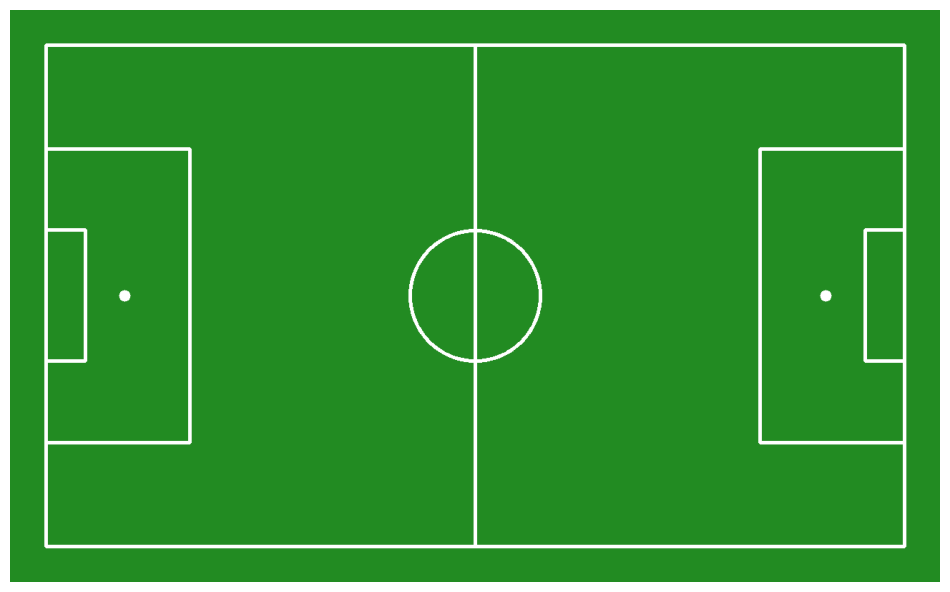

In [37]:
from sports.annotators.soccer import draw_pitch
from sports.configs.soccer import SoccerPitchConfiguration

CONFIG = SoccerPitchConfiguration()

annotated_frame = draw_pitch(CONFIG)

sv.plot_image(annotated_frame)

In [38]:
from tqdm import tqdm
import numpy as np
import supervision as sv
from sports.common.view import ViewTransformer

INPUT_VIDEO_PATH = "/content/2e57b9_0.mp4"
OUTPUT_VIDEO_PATH = "/content/2e57b9_0_pitch_overlay.mp4"

# Originale annotator-navn og farger
line_drawer = sv.EdgeAnnotator(
    color=sv.Color.from_hex('#32CD32'),  # LimeGreen
    thickness=2,
    edges=CONFIG.edges
)

ref_point_drawer = sv.VertexAnnotator(
    color=sv.Color.from_hex('#FFD700'),  # Gold
    radius=7
)

projected_point_drawer = sv.VertexAnnotator(
    color=sv.Color.from_hex('#00CED1'),  # DarkTurquoise
    radius=6
)

# Leser video og lager output
video_info = sv.VideoInfo.from_video_path(INPUT_VIDEO_PATH)
output_writer = sv.VideoSink(OUTPUT_VIDEO_PATH, video_info=video_info)

frames = sv.get_video_frames_generator(INPUT_VIDEO_PATH, start=200)

with output_writer:
    for frame in tqdm(frames, total=video_info.total_frames - 200, desc="Processing video"):

        # Inference på felt-nøkkelpunkter
        result = FIELD_DETECTION_MODEL.infer(frame, confidence=0.3)[0]
        keypoints = sv.KeyPoints.from_inference(result)

        # Filtrer ut punkter med lav confidence
        mask = keypoints.confidence[0] > 0.5
        detected_pts = keypoints.xy[0][mask]
        detected_kps = sv.KeyPoints(xy=detected_pts[np.newaxis, ...])

        # Matcher til pitch-referanse
        pitch_pts = np.array(CONFIG.vertices)[mask]

        transformer = ViewTransformer(source=pitch_pts, target=detected_pts)
        full_pitch = np.array(CONFIG.vertices)
        projected_pts = transformer.transform_points(full_pitch)
        projected_kps = sv.KeyPoints(xy=projected_pts[np.newaxis, ...])

        # Annotering
        annotated = frame.copy()
        annotated = line_drawer.annotate(scene=annotated, key_points=projected_kps)
        annotated = projected_point_drawer.annotate(scene=annotated, key_points=projected_kps)
        annotated = ref_point_drawer.annotate(scene=annotated, key_points=detected_kps)

        output_writer.write_frame(annotated)


Processing video: 100%|██████████| 550/550 [00:53<00:00, 10.35it/s]


## project ball, players and referies on pitch

In [34]:
import supervision as sv
from tqdm import tqdm
from sports.common.team import TeamClassifier

VIDEO_PATH = "/content/2e57b9_0.mp4"
TARGET_CLASS_ID = 2  # Spiller-ID
FRAME_INTERVAL = 30  # Hopp mellom frames

# Ny generator for å hente frames fra video
video_frames = sv.get_video_frames_generator(
    source_path=VIDEO_PATH,
    stride=FRAME_INTERVAL
)

player_thumbnails = []

# Gå gjennom videoen og saml inn utsnitt av spillere
for current_frame in tqdm(video_frames, desc="Henter spillerutsnitt"):
    # Kjør spillerdeteksjon
    inference_result = PLAYER_DETECTION_MODEL.infer(current_frame, confidence=0.3)[0]
    all_detections = sv.Detections.from_inference(inference_result)

    # Filtrer kun spillere
    player_detections = all_detections[all_detections.class_id == TARGET_CLASS_ID]

    # Beskjær ut spillerne og legg til i lista
    cropped_players = [sv.crop_image(current_frame, box) for box in player_detections.xyxy]
    player_thumbnails += cropped_players

# Klassifiser lag med TeamClassifier
team_identifier = TeamClassifier(device="cuda")
team_identifier.fit(player_thumbnails)


Henter spillerutsnitt: 25it [00:13,  1.87it/s]
Embedding extraction: 16it [00:05,  2.67it/s]


In [35]:
import cv2
from typing import Optional

def draw_pitch_voronoi_diagram_2(
    config: SoccerPitchConfiguration,
    team_1_xy: np.ndarray,
    team_2_xy: np.ndarray,
    team_1_color: sv.Color = sv.Color.RED,
    team_2_color: sv.Color = sv.Color.WHITE,
    opacity: float = 0.5,
    padding: int = 50,
    scale: float = 0.1,
    pitch: Optional[np.ndarray] = None
) -> np.ndarray:
    """
    Draws a Voronoi diagram on a soccer pitch representing the control areas of two
    teams with smooth color transitions.

    Args:
        config (SoccerPitchConfiguration): Configuration object containing the
            dimensions and layout of the pitch.
        team_1_xy (np.ndarray): Array of (x, y) coordinates representing the positions
            of players in team 1.
        team_2_xy (np.ndarray): Array of (x, y) coordinates representing the positions
            of players in team 2.
        team_1_color (sv.Color, optional): Color representing the control area of
            team 1. Defaults to sv.Color.RED.
        team_2_color (sv.Color, optional): Color representing the control area of
            team 2. Defaults to sv.Color.WHITE.
        opacity (float, optional): Opacity of the Voronoi diagram overlay.
            Defaults to 0.5.
        padding (int, optional): Padding around the pitch in pixels.
            Defaults to 50.
        scale (float, optional): Scaling factor for the pitch dimensions.
            Defaults to 0.1.
        pitch (Optional[np.ndarray], optional): Existing pitch image to draw the
            Voronoi diagram on. If None, a new pitch will be created. Defaults to None.

    Returns:
        np.ndarray: Image of the soccer pitch with the Voronoi diagram overlay.
    """
    if pitch is None:
        pitch = draw_pitch(
            config=config,
            padding=padding,
            scale=scale
        )

    scaled_width = int(config.width * scale)
    scaled_length = int(config.length * scale)

    voronoi = np.zeros_like(pitch, dtype=np.uint8)

    team_1_color_bgr = np.array(team_1_color.as_bgr(), dtype=np.uint8)
    team_2_color_bgr = np.array(team_2_color.as_bgr(), dtype=np.uint8)

    y_coordinates, x_coordinates = np.indices((
        scaled_width + 2 * padding,
        scaled_length + 2 * padding
    ))

    y_coordinates -= padding
    x_coordinates -= padding

    def calculate_distances(xy, x_coordinates, y_coordinates):
        return np.sqrt((xy[:, 0][:, None, None] * scale - x_coordinates) ** 2 +
                       (xy[:, 1][:, None, None] * scale - y_coordinates) ** 2)

    distances_team_1 = calculate_distances(team_1_xy, x_coordinates, y_coordinates)
    distances_team_2 = calculate_distances(team_2_xy, x_coordinates, y_coordinates)

    min_distances_team_1 = np.min(distances_team_1, axis=0)
    min_distances_team_2 = np.min(distances_team_2, axis=0)

    # Increase steepness of the blend effect
    steepness = 15  # Increased steepness for sharper transition
    distance_ratio = min_distances_team_2 / np.clip(min_distances_team_1 + min_distances_team_2, a_min=1e-5, a_max=None)
    blend_factor = np.tanh((distance_ratio - 0.5) * steepness) * 0.5 + 0.5

    # Create the smooth color transition
    for c in range(3):  # Iterate over the B, G, R channels
        voronoi[:, :, c] = (blend_factor * team_1_color_bgr[c] +
                            (1 - blend_factor) * team_2_color_bgr[c]).astype(np.uint8)

    overlay = cv2.addWeighted(voronoi, opacity, pitch, 1 - opacity, 0)

    return overlay

In [48]:
import cv2
import numpy as np
import supervision as sv
from sports.common.team import TeamClassifier
from sports.annotators.soccer import draw_pitch, draw_points_on_pitch, SoccerPitchConfiguration
from inference.models.utils import get_model

SOURCE_VIDEO_PATH = "/content/121364_0.mp4"
BALL_ID = 0
GOALKEEPER_ID = 1
PLAYER_ID = 2
REFEREE_ID = 3
DEVICE = "cuda"  # eller "cpu"

# ViewTransformer erstatning
class ViewTransformer:
    def __init__(self, source, target):
        assert len(source) == len(target), "Source og target må ha samme antall punkter"
        self.matrix = cv2.getPerspectiveTransform(np.float32(source), np.float32(target))

    def transform_points(self, points):
        points = np.array(points, dtype=np.float32)
        points = points.reshape(-1, 1, 2)
        transformed = cv2.perspectiveTransform(points, self.matrix)
        return transformed.reshape(-1, 2)

# Hvis du ikke har extract_crops, legg til denne enkle versjonen:
def extract_crops(video_path, num_frames=10):
    crops = []
    cap = cv2.VideoCapture(video_path)
    for _ in range(num_frames):
        ret, frame = cap.read()
        if not ret:
            break
        h, w, _ = frame.shape
        crop = frame[h//3:2*h//3, w//3:2*w//3]
        crops.append(crop)
    cap.release()
    return crops

# Konfigurasjon for banen
CONFIG = SoccerPitchConfiguration()

# Modell og klassifisering
crops = extract_crops(SOURCE_VIDEO_PATH)
team_classifier = TeamClassifier(device=DEVICE)
team_classifier.fit(crops)

tracker = sv.ByteTrack()
tracker.reset()

frame_generator = sv.get_video_frames_generator(SOURCE_VIDEO_PATH)
frame = next(frame_generator)

# Spillerdeteksjon
result = PLAYER_DETECTION_MODEL.infer(frame, confidence=0.3)[0]
detections = sv.Detections.from_inference(result)

ball_detections = detections[detections.class_id == BALL_ID]
ball_detections.xyxy = sv.pad_boxes(xyxy=ball_detections.xyxy, px=10)

all_detections = detections[detections.class_id != BALL_ID]
all_detections = all_detections.with_nms(threshold=0.5, class_agnostic=True)
all_detections = tracker.update_with_detections(all_detections)

players_detections = all_detections[all_detections.class_id == PLAYER_ID]
goalkeepers_detections = all_detections[all_detections.class_id == GOALKEEPER_ID]
referees_detections = all_detections[all_detections.class_id == REFEREE_ID]

players_crops = [sv.crop_image(frame, xyxy) for xyxy in players_detections.xyxy]
players_detections.class_id = team_classifier.predict(players_crops)

# Hvis du har en resolve_goalkeepers_team_id-funksjon, bruk den
# Ellers: Sett alle keepere til samme klasse (midlertidig løsning)
goalkeepers_detections.class_id = np.full(len(goalkeepers_detections), 0)

# Pitch keypoints
result = PITCH_DETECTION_MODEL.infer(frame, confidence=0.3)[0]
key_points = sv.KeyPoints.from_inference(result)

filter = key_points.confidence[0] > 0.5
frame_reference_points = key_points.xy[0][filter]
frame_reference_key_points = sv.KeyPoints(xy=frame_reference_points[np.newaxis, ...])
pitch_reference_points = np.array(CONFIG.vertices)[filter]

# Transformasjon
view_transformer = ViewTransformer(
    source=frame_reference_points,
    target=pitch_reference_points
)

frame_ball_xy = ball_detections.get_anchors_coordinates(sv.Position.BOTTOM_CENTER)
pitch_ball_xy = view_transformer.transform_points(frame_ball_xy)

frame_players_xy = players_detections.get_anchors_coordinates(sv.Position.BOTTOM_CENTER)
pitch_players_xy = view_transformer.transform_points(frame_players_xy)

frame_referees_xy = referees_detections.get_anchors_coordinates(sv.Position.BOTTOM_CENTER)
pitch_referees_xy = view_transformer.transform_points(frame_referees_xy)

# Tegn banen og punktene
pitch = draw_pitch(config=CONFIG)

pitch = draw_points_on_pitch(
    config=CONFIG,
    xy=pitch_ball_xy,
    face_color=sv.Color.WHITE,
    edge_color=sv.Color.BLACK,
    radius=10,
    pitch=pitch,
)

pitch = draw_points_on_pitch(
    config=CONFIG,
    xy=pitch_players_xy[players_detections.class_id == 0],
    face_color=sv.Color.from_hex("00BFFF"),
    edge_color=sv.Color.BLACK,
    radius=16,
    pitch=pitch,
)

pitch = draw_points_on_pitch(
    config=CONFIG,
    xy=pitch_players_xy[players_detections.class_id == 1],
    face_color=sv.Color.from_hex("FF1493"),
    edge_color=sv.Color.BLACK,
    radius=16,
    pitch=pitch,
)

pitch = draw_points_on_pitch(
    config=CONFIG,
    xy=pitch_referees_xy,
    face_color=sv.Color.from_hex("FFD700"),
    edge_color=sv.Color.BLACK,
    radius=16,
    pitch=pitch,
)


Embedding extraction: 1it [00:00,  3.70it/s]
Embedding extraction: 1it [00:00,  4.80it/s]


NameError: name 'PITCH_DETECTION_MODEL' is not defined

In [66]:
from collections import deque
import supervision as sv
from sports.annotators.soccer import draw_pitch, draw_points_on_pitch

SOURCE_VIDEO_PATH = "/content/2e57b9_0.mp4"
BALL_ID = 0
MAXLEN = 5

video_info = sv.VideoInfo.from_video_path(SOURCE_VIDEO_PATH)
frame_generator = sv.get_video_frames_generator(SOURCE_VIDEO_PATH)

path_raw = []
M = deque(maxlen=MAXLEN)

for frame in tqdm(frame_generator, total=video_info.total_frames):

    result = PLAYER_DETECTION_MODEL.infer(frame, confidence=0.3)[0]
    detections = sv.Detections.from_inference(result)

    ball_detections = detections[detections.class_id == BALL_ID]
    ball_detections.xyxy = sv.pad_boxes(xyxy=ball_detections.xyxy, px=10)

    result = FIELD_DETECTION_MODEL.infer(frame, confidence=0.3)[0]
    key_points = sv.KeyPoints.from_inference(result)

    filter = key_points.confidence[0] > 0.5
    frame_reference_points = key_points.xy[0][filter]
    pitch_reference_points = np.array(CONFIG.vertices)[filter]

    transformer = ViewTransformer(
        source=frame_reference_points,
        target=pitch_reference_points
    )
    M.append(transformer.m)
    transformer.m = np.mean(np.array(M), axis=0)

    frame_ball_xy = ball_detections.get_anchors_coordinates(sv.Position.BOTTOM_CENTER)
    pitch_ball_xy = transformer.transform_points(points=frame_ball_xy)

    path_raw.append(pitch_ball_xy)

100%|██████████| 750/750 [04:20<00:00,  2.88it/s]


In [67]:
path = [
    np.empty((0, 2), dtype=np.float32) if coorinates.shape[0] >= 2 else coorinates
    for coorinates
    in path_raw
]

path = [coorinates.flatten() for coorinates in path]

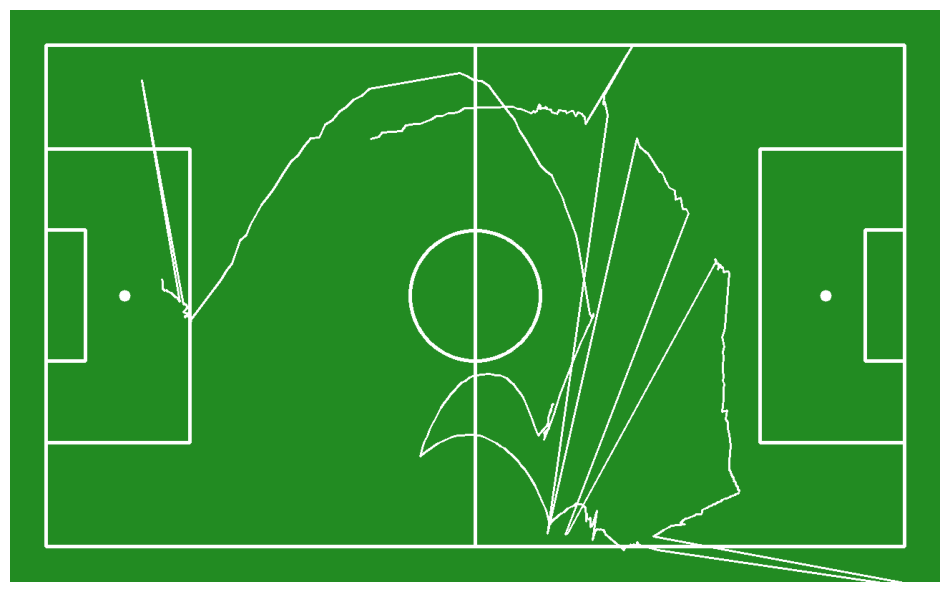

In [68]:
from sports.annotators.soccer import draw_paths_on_pitch

annotated_frame = draw_pitch(CONFIG)
annotated_frame = draw_paths_on_pitch(
    config=CONFIG,
    paths=[path],
    color=sv.Color.WHITE,
    pitch=annotated_frame)

sv.plot_image(annotated_frame)